In [1]:
import numpy as np
import cv2 
import random
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
DIRECTORY = r'dogs-cats-images\dataset'
print(DIRECTORY)
SETS = ['training_set', 'test_set']
CATEGORIES = ['cats', 'dogs']


dogs-cats-images\dataset


In [3]:
IMG_SIZE = 64
data_set = []

for sets in SETS:
    path = os.path.join(DIRECTORY, sets)
    data = []
    for category in CATEGORIES:
        folder = os.path.join(path, category)
        label = CATEGORIES.index(category)
        for img in os.listdir(folder):
            img_path = os.path.join(folder, img)
            img_arr = cv2.imread(img_path)
            img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            data.append([img_arr, label])
    random.shuffle(data)
    data_set.append(data)
    

In [4]:
train_x_orig, train_y, test_x_orig, test_y = [], [], [], []
training = data_set[0]
testing = data_set[1]
for x, y in training:
    train_x_orig.append(x)
    train_y.append(y)

for x, y in testing:
    test_x_orig.append(x)
    test_y.append(y)


train_x_orig, train_y, test_x_orig, test_y = np.array(train_x_orig), np.reshape(np.array(train_y), (1, -1)), np.array(test_x_orig), np.reshape(np.array(test_y), (1, -1))

In [5]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training examples: "+str(m_train))
print("Number of testing examples: "+str(m_test))
print("Each image is of size: ("+str(num_px)+", "+str(num_px)+ ", 3)")
print("train_x_orig shape: " + str(train_x_orig.shape))
print("train_y shape: "+str(train_y.shape))
print("test_x_orig shape: " + str(test_x_orig.shape))
print("test_y shape: "+str(test_y.shape))

Number of training examples: 8000
Number of testing examples: 2000
Each image is of size: (64, 64, 3)
train_x_orig shape: (8000, 64, 64, 3)
train_y shape: (1, 8000)
test_x_orig shape: (2000, 64, 64, 3)
test_y shape: (1, 2000)


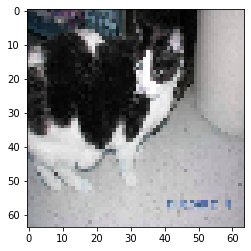

In [6]:
idx = 7
plt.imshow(train_x_orig[idx])

In [7]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print("train_x shape: "+str(train_x.shape))
print("test_x shape: "+str(test_x.shape))

train_x shape: (12288, 8000)
test_x shape: (12288, 2000)


In [8]:
layers_dims = [12288, 20, 7, 5, 1]

In [12]:
import import_ipynb
from Building_blocks_DNN import *

In [13]:
def L_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0 or i == num_iterations -1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))

        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

    


In [16]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


Cost after iteration 0: 0.6931471436975198
Cost after iteration 100: 0.6931471436080782
Cost after iteration 200: 0.6931471435179293
Cost after iteration 300: 0.6931471434395047
Cost after iteration 400: 0.6931471433646205
Cost after iteration 500: 0.6931471432874337
Cost after iteration 600: 0.6931471432141756
Cost after iteration 700: 0.69314714314397
Cost after iteration 800: 0.6931471430785766
Cost after iteration 900: 0.6931471430153194
Cost after iteration 1000: 0.6931471429554383
Cost after iteration 1100: 0.6931471428972551
Cost after iteration 1200: 0.6931471428394211
Cost after iteration 1300: 0.6931471427806676
Cost after iteration 1400: 0.6931471427230103
Cost after iteration 1500: 0.6931471426665426
Cost after iteration 1600: 0.6931471426108049
Cost after iteration 1700: 0.6931471425547459
Cost after iteration 1800: 0.693147142500233
Cost after iteration 1900: 0.6931471424471117
Cost after iteration 2000: 0.6931471423954594
Cost after iteration 2100: 0.6931471423446721
Cos

In [17]:
import import_ipynb
from Building_blocks_DNN import *

In [18]:
pred_test = predict(test_x, test_y, parameters)

NameError: name 'predict' is not defined